## Homework 3 - Berkeley STAT 157

Handout 2/5/2019, due 2/12/2019 by 4pm in Git by committing to your repository.

**Formatting: please include both a .ipynb and .pdf file in your homework submission, named homework3.ipynb and homework3.pdf. You can export your notebook to a pdf either by File -> Download as -> PDF via Latex (you may need Latex installed), or by simply printing to a pdf from your browser (you may want to do File -> Print Preview in jupyter first). Please don't change the filename.**       

In [242]:
from mxnet import nd, autograd, gluon
import matplotlib.pyplot as plt
from mxnet.gluon import nn

# 1. Logistic Regression for Binary Classification

In multiclass classification we typically use the exponential model 

$$p(y|\mathbf{o}) = \mathrm{softmax}(\mathbf{o})_y = \frac{\exp(o_y)}{\sum_{y'} \exp(o_{y'})}$$

1.1. Show that this parametrization has a spurious degree of freedom. That is, show that both $\mathbf{o}$ and $\mathbf{o} + c$ with $c \in \mathbb{R}$ lead to the same probability estimate.
1.2. For binary classification, i.e. whenever we have only two classes $\{-1, 1\}$, we can arbitrarily set $o_{-1} = 0$. Using the shorthand $o = o_1$ show that this is equivalent to 

$$p(y=1|o) = \frac{1}{1 + \exp(-o)}$$

1.3. Show that the log-likelihood loss (often called logistic loss) for labels $y \in \{-1, 1\}$ is thus given by 

$$-\log p(y|o) = \log (1 + \exp(-y \cdot o))$$

1.4. Show that for $y = 1$ the logistic loss asymptotes to $o$ for $o \to \infty$ and to $\exp(o)$ for $o \to -\infty$. 

### Solution    
1.1  $$p(y|\mathbf{o+c}) = \mathrm{softmax}(\mathbf{o+c})_y = \frac{\exp(o_y)*\exp(c)}{\sum_{y'} \exp(o_{y'})* \exp(c)} = \mathrm{softmax}(\mathbf{o})_y$$    
1.2  $$p(y= 1|o) = \mathrm{softmax}(o) = \frac{exp(o)}{\exp(0) + \exp(o)} = \frac{\exp(o)*\exp(-o)}{\exp(0)*\exp(-o) + \exp(o)* \exp(-o)} = \frac{1}{1 + \exp(-o)} $$   
1.3
$$p(y=1|o_1) = \frac{1}{1 + \exp(-o_1)} = \frac{1}{1 + \exp((- 1*o_1)}$$   
$$p(y= -1|o_{-1})) = \frac{1}{1 + \exp(o_{-1})} = \frac{1}{1 + \exp((- (-1)*o_{-1})}$$   
$$Therefore,$$    
$$-\log p(y|o) = \log (1 + \exp(-y \cdot o))$$    
  


1.4 Question here, is there a typo here? Because for \log (1 + \exp(-o)), the graph looks like Figure 1 (illustrated below). There is no way for logistic loss at y = 1 asymptotes to $o$ for $o \to \infty$ and to $\exp(o)$ for $o \to -\infty$. 

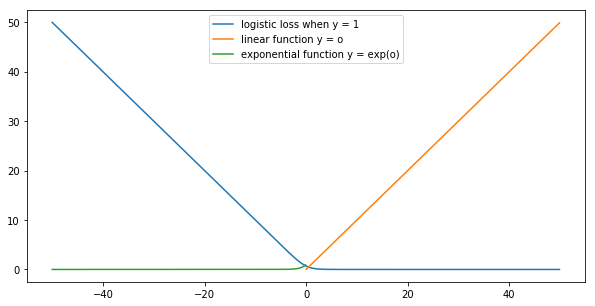

In [13]:
import numpy as np
x1 = np.arange(-50,50,0.1)
y1 = np.log(1 + np.exp(-x))
x2 = np.arange(0,50,0.1)
y2 = x2
x3 = np.arange(-50,0,0.1)
y3 = np.exp(x3)
plt.figure(num = 1, figsize = (10,5))
plt.plot(x1,y1, label = 'logistic loss when y = 1')
plt.plot(x2,y2, label = 'linear function y = o')
plt.plot(x3,y3, label = 'exponential function y = exp(o)')
plt.legend(loc = 'best')
plt.show()

So I will prove: logistic loss at y = -1 asymptotes to $o$ for $o \to \infty$ and to $\exp(o)$ for $o \to -\infty$.    
   
To prove that, we could subtract $\exp(o)$ from logistic loss:  
$$-\log p(y = -1|o) = \log (1 + \exp(o))$$   
$$\lim_{o \to \infty} (\log (1 + \exp(-o)) - o )= 0$$ 
And that is to prove the following:   
$$\lim_{o \to \infty} \frac{(1 + \exp(o))}{\exp(o)}  = 1$$ 
And that is to prove the following:   
Using L'Hôpital's rule:   
$$\lim_{o \to \infty} \frac{\exp(o)}{\exp(o)}  = 1$$
Proved.   

For the second part: 
$$\lim_{o \to -\infty} (\log (1 + \exp(-o)) - \exp(o) )= 0$$ 
And that is to prove the following:   
$$\lim_{o \to -\infty} \frac{(1 + \exp(o))}{\exp(\exp(o))}  = \lim_{o \to -\infty} \frac{1 + 0}{1} = 1$$   
Proved.   

# 2. Logistic Regression and Autograd

1. Implement the binary logistic loss $l(y,o) = \log (1 + \exp(-y \cdot o))$ in Gluon
1. Plot its values for $y \in \{-1, 1\}$ over the range of $o \in [-5, 5]$.
1. Plot its derivative with respect to $o$ for $o \in [-5, 5]$ using 'autograd'.

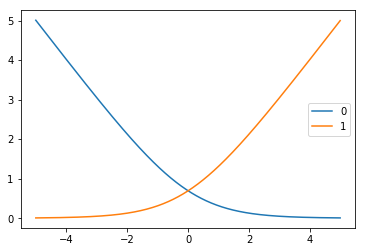

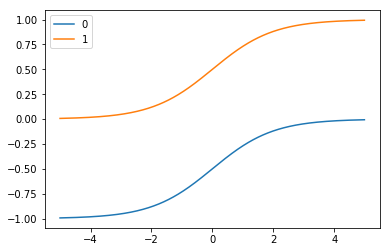

In [16]:
# problem 1
def loss(y,o):
    ## add your loss function here
    l = nd.log(1 + nd.exp(nd.dot(y, o)))
    return l

#Problem 2
o = nd.arange(-5, 5, 0.01).reshape((1,1000))
y = nd.array([-1,1]).reshape((2,1))
l = loss(y, o)
onp = o.asnumpy()[0]
plt.plot(onp,l[0,:].asnumpy(), label = 'class of y = -1')
plt.plot(onp,l[0,:].asnumpy(), label = 'class of y = 1')
    
plt.legend(loc = 'best')
plt.show()

#Problem 3
o.attach_grad()
y.attach_grad()
for i in range(2):
    with autograd.record():
        func = loss(y,o)[i,:]
    func.backward()
    plt.plot(onp,o.grad.asnumpy().reshape(1000,),label = 'class of ' + i)
plt.legend(loc = 'best')
plt.show()
    

# 3. Ohm's Law

Imagine that you're a young physicist, maybe named [Georg Simon Ohm](https://en.wikipedia.org/wiki/Georg_Ohm), trying to figure out how current and voltage depend on each other for resistors. You have some idea but you aren't quite sure yet whether the dependence is linear or quadratic. So you take some measurements, conveniently given to you as 'ndarrays' in Python. They are indicated by 'current' and 'voltage'.

Your goal is to use least mean squares regression to identify the coefficients for the following three models using automatic differentiation and least mean squares regression. The three models are:

1. Quadratic model where $\mathrm{voltage} = c + r \cdot \mathrm{current} + q \cdot \mathrm{current}^2$.
1. Linear model where $\mathrm{voltage} = c + r \cdot \mathrm{current}$.
1. Ohm's law where $\mathrm{voltage} = r \cdot \mathrm{current}$.

In [88]:
current = nd.array([1.5420291, 1.8935232, 2.1603365, 2.5381863, 2.893443, \
                    3.838855, 3.925425, 4.2233696, 4.235571, 4.273397, \
                    4.9332876, 6.4704757, 6.517571, 6.87826, 7.0009003, \
                    7.035741, 7.278681, 7.7561755, 9.121138, 9.728281])
voltage = nd.array([63.802246, 80.036026, 91.4903, 108.28776, 122.781975, \
                    161.36314, 166.50816, 176.16772, 180.29395, 179.09758, \
                    206.21027, 272.71857, 272.24033, 289.54745, 293.8488, \
                    295.2281, 306.62274, 327.93243, 383.16296, 408.65967])

In [116]:
# Least mean square regression uses L2 Loss Function.
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

# Define optimization 
def sgd(params, lr):
    for param in params:
        param[:] = param - lr * param.grad
        #print(params)

#define model
def linreg(X, w):
    return nd.dot(X, w)

#some constant variables
num_examples = 20
num_epochs = 7 
net = linreg


def reg(current, voltage, num_inputs, lr):
    w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
    #b = nd.zeros(shape=(1,))
    w.attach_grad()
    #b.attach_grad()
    
    for epoch in range(num_epochs):
        with autograd.record():
            l = squared_loss(net(current, w), voltage) 
        l.backward()  # Compute gradient on l with respect to [w,b]
        
        sgd([w], lr)  # Update parameters using their gradient
        train_l = squared_loss(net(current, w), voltage)
        print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))
    return w

#For Quadratic:
current2 = current ** 2
current = current.reshape(20,1)
current2 = current2.reshape(20,1)
b = nd.ones(shape=(20,1))
temp = nd.concat(current, current2, dim =1) #20*2 matrix
X_q  = nd.concat(temp,b,dim=1)
y_q = voltage.T
lr = 0.00001  # Learning rate
print('for quadratic:\n')
print('The parameter: \n', reg(X_q, y_q, 3, lr))

#For linear:
X_l = nd.concat(current, b)
y_l = voltage
lr = 0.001  # Learning rate
print('for linear:\n')
print('The parameter: \n',reg(X_l, y_l, 2, lr))

#For b = 0
ohm_x = current
ohm_y = voltage.T
lr = 0.001  # Learning rate
print('for Ohm\'s Law:\n')
print('The parameter: \n',reg(ohm_x, ohm_y, 1, lr))

for quadratic:

epoch 1, loss 13048.135742
epoch 2, loss 6552.913086
epoch 3, loss 3870.104736
epoch 4, loss 2761.270508
epoch 5, loss 2302.261475
epoch 6, loss 2111.537354
epoch 7, loss 2031.577515
The parameter: 
 
[[0.813566  ]
 [5.18323   ]
 [0.14374147]]
<NDArray 3x1 @cpu(0)>
for linear:

epoch 1, loss 3122.714111
epoch 2, loss 339.654236
epoch 3, loss 39.825253
epoch 4, loss 7.507545
epoch 5, loss 4.008151
epoch 6, loss 3.613388
epoch 7, loss 3.553188
The parameter: 
 
[[41.012882]
 [ 6.421256]]
<NDArray 2x1 @cpu(0)>
for Ohm's Law:

epoch 1, loss 3445.954590
epoch 2, loss 410.433105
epoch 3, loss 49.358559
epoch 4, loss 6.409017
epoch 5, loss 1.300173
epoch 6, loss 0.692465
epoch 7, loss 0.620178
The parameter: 
 
[[42.032295]]
<NDArray 1x1 @cpu(0)>


# 4. Entropy

Let's compute the *binary* entropy of a number of interesting data sources. 

1. Assume that you're watching the output generated by a [monkey at a typewriter](https://en.wikipedia.org/wiki/File:Chimpanzee_seated_at_typewriter.jpg). The monkey presses any of the $44$ keys of the typewriter at random (you can assume that it has not discovered any special keys or the shift key yet). How many bits of randomness per character do you observe?
1. Unhappy with the monkey you replaced it by a drunk typesetter. It is able to generate words, albeit not coherently. Instead, it picks a random word out of a vocabulary of $2,000$ words. Moreover, assume that the average length of a word is $4.5$ letters in English. How many bits of randomness do you observe now?
1. Still unhappy with the result you replace the typesetter by a high quality language model. These can obtain perplexity numbers as low as 20 points per character. The perplexity is defined as a length normalized probability, i.e.

$$\mathrm{PPL}(x) = \left[p(x)\right]^{1/\mathrm{length}(x)}$$

### My Answer   
1. For a monkey, the probability that it types a specific character has the same probability.   
$$S(character) = -{\sum_i}P(x_i) * \log_2(P(x_i)) = -44 * \frac{1}{44} * \log_2 \frac{1}{44} = 5.4594 bit$$   
1. For the drunk typer, the probability that it types a speicific word has the same probability.  
$$S(word) = -{\sum_i}P(x_i) * \log_2(P(x_i)) = -2000 * \frac{1}{2000} * \log_2 \frac{1}{2000} = 10.9658 bit$$ 
$$S(character) = \frac{10.9658}{4.5} = 2.4368bit$$ 
1. Question: Is the PPL formula here missing a minus sign? i.e.   
$$\mathrm{PPL}(x) = \left[p(x)\right]^{- 1/\mathrm{length}(x)}$$
So if the PPL for each character is 20, then the probability for each character to appear is 1/20.   
$$S(character) = -{\sum_i}P(x_i) * \log_2(P(x_i)) = - 44 * \frac{1}{20} * \log_2 \frac{1}{20} = 9.5082 bit$$   

# 5. Wien's Approximation for the Temperature (bonus)

We will now abuse Gluon to estimate the temperature of a black body. The energy emanated from a black body is given by Wien's approximation.

$$B_\lambda(T) = \frac{2 h c^2}{\lambda^5} \exp\left(-\frac{h c}{\lambda k T}\right)$$

That is, the amount of energy depends on the fifth power of the wavelength $\lambda$ and the temperature $T$ of the body. The latter ensures a cutoff beyond a temperature-characteristic peak. Let us define this and plot it.

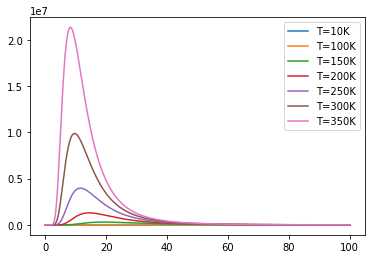

In [272]:
# Lightspeed
c = 299792458
# Planck's constant
h = 6.62607004e-34
# Boltzmann constant
k = 1.38064852e-23
# Wavelength scale (nanometers)
lamscale = 1e-6
# Pulling out all powers of 10 upfront
p_out = 2 * h * c**2 / lamscale**5
p_in = (h / k) * (c/lamscale) 

# Wien's law
def wien(lam, t):
    return (p_out / lam**5) * nd.exp(-p_in / (lam * t))

# Plot the radiance for a few different temperatures
lam = nd.arange(0,100,0.01)
for t in [10, 100, 150, 200, 250, 300, 350]:
    radiance = wien(lam, t)
    plt.plot(lam.asnumpy(), radiance.asnumpy(), label=('T=' + str(t) + 'K'))
plt.legend()
plt.show()

Next we assume that we are a fearless physicist measuring some data. Of course, we need to pretend that we don't really know the temperature. But we measure the radiation at a few wavelengths.  

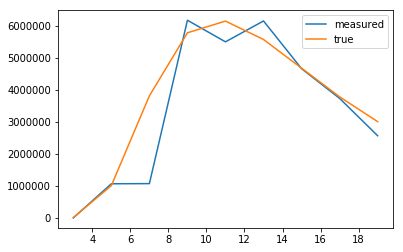

In [273]:
# real temperature is approximately 0C
realtemp = 273
# we observe at 3000nm up to 20,000nm wavelength
wavelengths = nd.arange(3,20,2)
# our infrared filters are pretty lousy ...
delta = nd.random_normal(shape=(len(wavelengths))) * 1

radiance = wien(wavelengths + delta,realtemp)
plt.plot(wavelengths.asnumpy(), radiance.asnumpy(), label='measured')
plt.plot(wavelengths.asnumpy(), wien(wavelengths, realtemp).asnumpy(), label='true')
plt.legend()
plt.show()

In [37]:
print(nd.log(radiance).reshape(9,1))
ln_wave = nd.log(wavelengths).reshape(9,1)
inverse_wave = (1/wavelengths).reshape(9,1)
X = nd.concat(ln_wave, inverse_wave, dim = 1)
print(X)
import math
print(math.log(p_out))
print(p_in/273)


[[12.620253]
 [14.29146 ]
 [15.252   ]
 [15.582669]
 [15.622479]
 [15.400139]
 [15.409939]
 [15.39192 ]
 [14.851375]]
<NDArray 9x1 @cpu(0)>

[[1.0986123  0.33333334]
 [1.609438   0.2       ]
 [1.9459101  0.14285715]
 [2.1972246  0.11111111]
 [2.3978953  0.09090909]
 [2.5649493  0.07692308]
 [2.7080503  0.06666667]
 [2.8332133  0.05882353]
 [2.944439   0.05263158]]
<NDArray 9x2 @cpu(0)>
32.41102065597583
52.70246717317657


Use Gluon to estimate the real temperature based on the variables `wavelengths` and `radiance`. 

* You can use Wien's law implementation `wien(lam,t)` as your forward model. 
* Use the loss function $l(y,y') = (\log y - \log y')^2$ to measure accuracy.

In [286]:
#Define X and y
y = nd.log(radiance)
ln_wave = nd.log(wavelengths).reshape(9,1)
inverse_wave = (1/wavelengths).reshape(9,1)
X = nd.concat(ln_wave, inverse_wave, dim = 1)

# Define the model
from mxnet.gluon import nn
net = nn.Sequential()
net.add(nn.Dense(1))

#initialization
# It should be initialized around 50 for p_in/T 
# Here is an self-defined initializer
class MyInit(init.Initializer):
    def __init__(self):
        super(MyInit, self).__init__()
        self._verbose = True
    def _init_weight(self, _, arr):
        #print('init weight', arr.shape)
        nd.random.normal(loc = 50, scale=5, out=arr)
        
from mxnet import init
net.initialize(MyInit())

#Define the Loss Function
def loss(y_hat, y):
    return (y.reshape(y_hat.shape)-y_hat) ** 2

#Optimization algorithm
from mxnet import gluon
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.015})

#Train
num_epochs = 500
for epoch in range(1, num_epochs + 1):
    with autograd.record():
        l = loss(net(X), y)
    l.backward()
    trainer.step(1) 
    
    l = loss(net(X), y)
    print('epoch %d, loss: %f' % (epoch, l.mean().asnumpy()))

epoch 1, loss: 2651.421387
epoch 2, loss: 1388.943848
epoch 3, loss: 730.615784
epoch 4, loss: 387.298065
epoch 5, loss: 208.231400
epoch 6, loss: 114.808632
epoch 7, loss: 66.043190
epoch 8, loss: 40.564201
epoch 9, loss: 27.228724
epoch 10, loss: 20.226662
epoch 11, loss: 16.528517
epoch 12, loss: 14.554642
epoch 13, loss: 13.481340
epoch 14, loss: 12.879069
epoch 15, loss: 12.523822
epoch 16, loss: 12.298738
epoch 17, loss: 12.142855
epoch 18, loss: 12.024331
epoch 19, loss: 11.926517
epoch 20, loss: 11.840706
epoch 21, loss: 11.762294
epoch 22, loss: 11.688855
epoch 23, loss: 11.619098
epoch 24, loss: 11.552281
epoch 25, loss: 11.488017
epoch 26, loss: 11.426044
epoch 27, loss: 11.366205
epoch 28, loss: 11.308380
epoch 29, loss: 11.252481
epoch 30, loss: 11.198431
epoch 31, loss: 11.146160
epoch 32, loss: 11.095600
epoch 33, loss: 11.046702
epoch 34, loss: 10.999392
epoch 35, loss: 10.953629
epoch 36, loss: 10.909357
epoch 37, loss: 10.866525
epoch 38, loss: 10.825078
epoch 39, los

epoch 500, loss: 8.796779


In [287]:
w = net[0].weight.data()
print(w)
b = net[0].bias.data()
print(b)

T = p_in/w[0][1]
print('The predict real value:', T)
# The predict temperature is 292.


[[10.2721   38.518993]]
<NDArray 1x2 @cpu(0)>

[-14.240705]
<NDArray 1 @cpu(0)>
The predict real value: 
[373.52414]
<NDArray 1 @cpu(0)>


In [280]:
# This is another try without using Gluon
t = nd.random.normal(loc = 100, scale=1, shape=(1, 1))[0]
t.attach_grad()

def func(X, t):
    return  math.log(p_out) - 5* X[:,0] - (p_in/t) * X[:,1]

def log_loss(y_hat, y):
    return (nd.log(y.reshape(y_hat.shape))-nd.log(y_hat)) ** 2

def sgd(params, lr):
    for param in params:
        param[:] = param - lr * param.grad
        print(param)

lr = 0.0001 # Learning rate
num_epochs = 3  # Number of iterations
net = func
loss = log_loss

for epoch in range(num_epochs):
    with autograd.record():
        l = loss(net(X,t), y)
    l.backward()  # Compute gradient on l with respect to [w,b]
    sgd([t], lr)  # Update parameters using their gradient
    train_l = log_loss(net(X,t), y)       
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))


[nan]
<NDArray 1 @cpu(0)>
epoch 1, loss nan

[nan]
<NDArray 1 @cpu(0)>
epoch 2, loss nan

[nan]
<NDArray 1 @cpu(0)>
epoch 3, loss nan


In [278]:
print(t)
print('the predicted temperature: ', p_in/t[0])


[nan]
<NDArray 1 @cpu(0)>
the predicted temperature:  
[nan]
<NDArray 1 @cpu(0)>
